In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
df = pd.read_excel("../data/metadata/all_metadata.xlsx", sheet_name="all")
df.head()

,strain_id,collection_time,host,host_species,county,state
0,DQ164189,2003,bird,American crow,Albany,NY
1,DQ164188,2003,bird,American crow,Westchester,NY
2,DQ164186,2002,bird,American Crow,NaN,NY
3,DQ164187,2002,bird,American Crow,NaN,NY
4,DQ164190,2003,bird,American Crow,NaN,NY


In [43]:
df["host"].value_counts() 

host
mosquito    1057
bird         983
human         39
Name: count, dtype: int64

In [78]:
time_counts = df["collection_time"].apply(lambda x: str(x)[:4]).value_counts()
time_counts.sort_index(inplace=True)
time_counts = time_counts[1:]

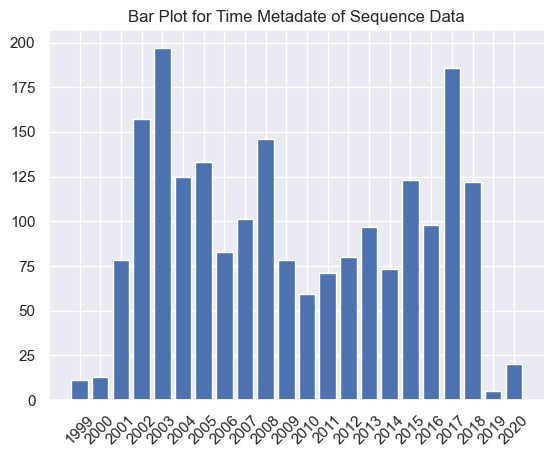

In [84]:
plt.bar(time_counts.index, list(time_counts))
plt.title('Bar Plot for Time Metadate of Sequence Data')

plt.xticks(rotation=45)
plt.savefig("time metadata.png")

In [57]:
apply

Object `apply` not found.


In [47]:
counts = df['host_species'].value_counts() 

print(counts.to_string())

host_species
Culex tarsalis                  217
American Crow                   208
American Crow                   180
Culex quinquefasciatus          172
Culex pipiens                    97
Culex restuans                   85
CA Scrub-Jay                     75
Blue Jay                         67
American White Pelican           55
Culex quinq.                     46
human- plasma                    34
Yellow-billed Magpie             32
Crow                             31
Culex. pipiens                   23
Western Scrub-Jay                17
House Finch                      15
House Sparrow                    13
Culex. PIPIENS                   11
Culex sp.                        11
Hawk                             11
Great Horned Owl                 10
Culex salinarius                 10
Cs. melanura                     10
Culex. tarsalis                  10
American Robin                    9
Sharp-shinned hawk                9
Western Scrub Jay                 9
Culex pipiens/r

In [51]:
with pd.ExcelWriter("counts.xlsx") as writer:  
    for host in ["mosquito", "bird"]: 
        counts = df[df["host"] == host]['host_species'].value_counts() 

        df_counts = pd.DataFrame(data={"species":list(counts.index),"count":list(counts)})
        df_counts.to_excel(writer, sheet_name=host)

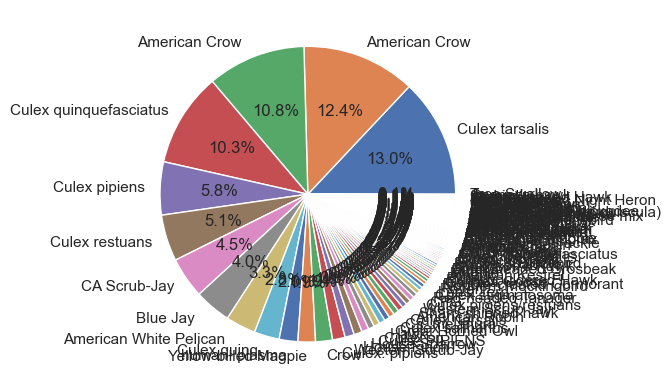

In [40]:
plt.pie(df["count"]/ sum(df["count"]), labels = df["species"], autopct='%1.1f%%')
plt.show() 

In [9]:
df_state

,State,Count
0,CA,942
1,CT,160
2,MN,134
3,IA,120
4,CO,112
5,NY,87
6,IL,61
7,LA,49
8,TX,48
9,NH,41


In [47]:
count_state = df['state'].value_counts()
df_state = pd.DataFrame(data={"State":count_state.index, "Count":list(count_state)})
df_state.loc[41,"State"] = "CT"

# plt.pie(df_state["Count"]/ sum(df_state["Count"]), labels = df_state["State"], autopct='%1.1f%%')
# plt.show() 

df_state_top10 = df_state[:10]
df_state_top10

,State,Count
0,CA,942
1,CT,160
2,MN,134
3,IA,120
4,CO,112
5,NY,87
6,IL,61
7,LA,49
8,TX,48
9,NH,41


In [48]:
df_state_top10.loc[-1] = ["Other", sum(df_state[10:]["Count"])]  # adding a row
df_state_top10.index = df_state_top10.index + 1  # shifting index
df_state_top10 = df_state_top10.sort_index()
df_state_top10

/var/folders/pf/xbfnf82j50d4lq3dvt97gm5c0000gn/T/ipykernel_3742/1360040725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_top10.loc[-1] = ["Other", sum(df_state[10:]["Count"])]  # adding a row


,State,Count
0,Other,328
1,CA,942
2,CT,160
3,MN,134
4,IA,120
5,CO,112
6,NY,87
7,IL,61
8,LA,49
9,TX,48


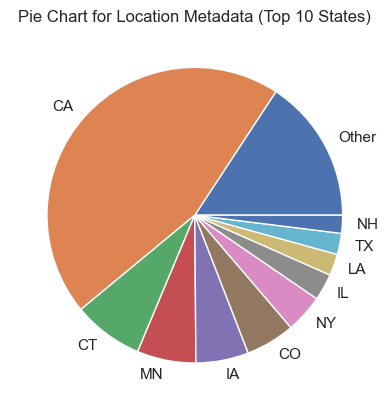

In [83]:
plt.pie(df_state_top10["Count"], labels = df_state_top10["State"])
plt.title("Pie Chart for Location Metadata (Top 10 States)") 
# plt.ylabel("Count")
# plt.xlabel("State")

plt.savefig("states (top 10).png")


In [28]:
!pwd

/Users/liam/west/visualization


In [11]:
df_state

,State,Count
0,CA,942
1,CT,160
2,MN,134
3,IA,120
4,CO,112
5,NY,87
6,IL,61
7,LA,49
8,TX,48
9,NH,41


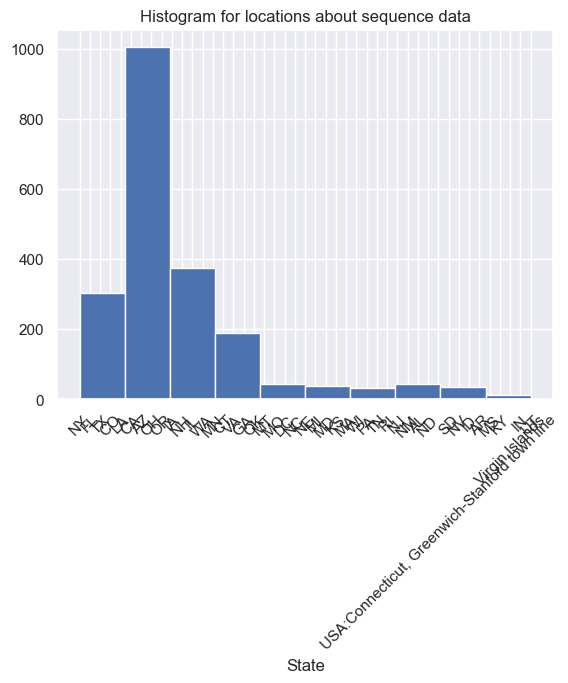

In [22]:
df['state'].hist()
plt.title('Histogram for locations about sequence data')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()